In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Reading the dataset
df = pd.read_csv("Match_Winner.csv")

# Display the first 5 rows of the dataset
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [3]:
# Display the first 5 rows of the dataset
df.columns

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [4]:
# summary statistics for numerical columns
df.describe

<bound method NDFrame.describe of        Season   MatchDate        HomeTeam       AwayTeam  FullTimeHomeGoals  \
0     2000/01  2000-08-19        Charlton       Man City                  4   
1     2000/01  2000-08-19         Chelsea       West Ham                  4   
2     2000/01  2000-08-19        Coventry  Middlesbrough                  1   
3     2000/01  2000-08-19           Derby    Southampton                  2   
4     2000/01  2000-08-19           Leeds        Everton                  2   
...       ...         ...             ...            ...                ...   
9375  2024/25  2025-05-04       Brentford     Man United                  4   
9376  2024/25  2025-05-04        Brighton      Newcastle                  1   
9377  2024/25  2025-05-04        West Ham      Tottenham                  1   
9378  2024/25  2025-05-04         Chelsea      Liverpool                  3   
9379  2024/25  2025-05-05  Crystal Palace  Nott'm Forest                  1   

      FullTimeAwa

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             9380 non-null   object
 1   MatchDate          9380 non-null   object
 2   HomeTeam           9380 non-null   object
 3   AwayTeam           9380 non-null   object
 4   FullTimeHomeGoals  9380 non-null   int64 
 5   FullTimeAwayGoals  9380 non-null   int64 
 6   FullTimeResult     9380 non-null   object
 7   HalfTimeHomeGoals  9380 non-null   int64 
 8   HalfTimeAwayGoals  9380 non-null   int64 
 9   HalfTimeResult     9380 non-null   object
 10  HomeShots          9380 non-null   int64 
 11  AwayShots          9380 non-null   int64 
 12  HomeShotsOnTarget  9380 non-null   int64 
 13  AwayShotsOnTarget  9380 non-null   int64 
 14  HomeCorners        9380 non-null   int64 
 15  AwayCorners        9380 non-null   int64 
 16  HomeFouls          9380 non-null   int64 


In [6]:
# Checking null values in each column
df.isnull().sum()

Season               0
MatchDate            0
HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [7]:
# Dropping unnecessary columns that are not required for the analysis
df=df.drop(['Season', 'MatchDate','FullTimeHomeGoals','FullTimeAwayGoals','HomeShots','AwayShots','HomeShotsOnTarget','AwayShotsOnTarget','HomeCorners','AwayCorners',
       'HomeFouls','AwayFouls','HomeYellowCards','AwayYellowCards','HomeRedCards','AwayRedCards'],axis=1)

In [8]:
# Print remaining columns
print(df.columns)

Index(['HomeTeam', 'AwayTeam', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult'],
      dtype='object')


In [9]:
#Check again for missing values after dropping columns
print(df.isnull().sum())

HomeTeam             0
AwayTeam             0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
dtype: int64


In [10]:
# Count the number of duplicate rows in the dataset
print(df.duplicated().sum())

2704


In [11]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

In [12]:
# no duplicate rows left
print(df.duplicated().sum())

0


In [13]:
# cleaned dataset
df.to_csv("cleaned_Match_Winner.csv", index=False)

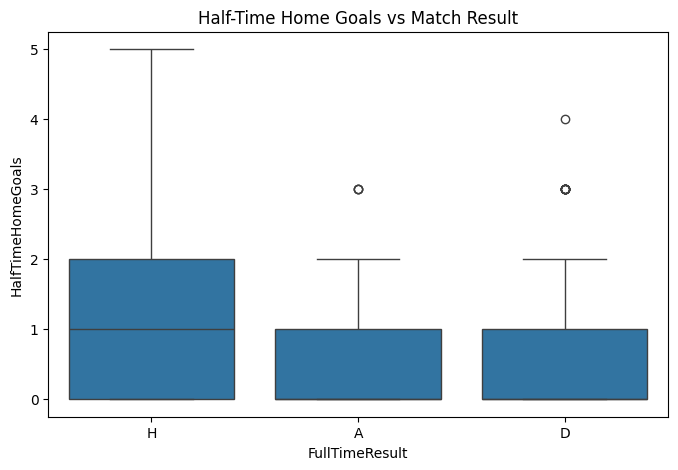

In [14]:
# Boxplot for HalfTimeHomeGoals vs FullTimeResult
plt.figure(figsize=(8,5))
sns.boxplot(x='FullTimeResult', y='HalfTimeHomeGoals', data=df)
plt.title("Half-Time Home Goals vs Match Result")
plt.show()

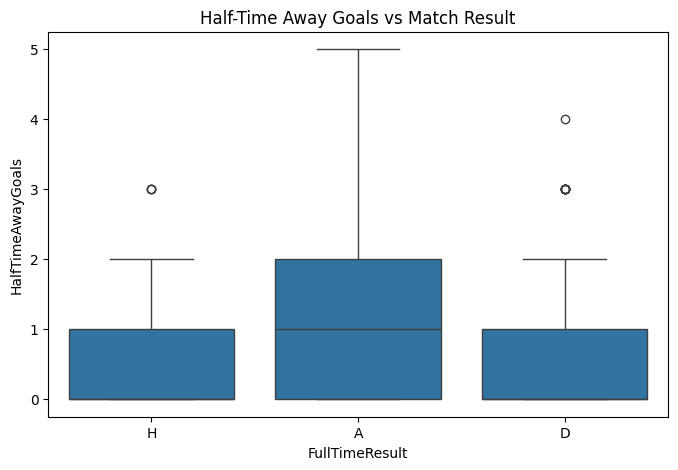

In [15]:
# Boxplot for HalfTimeAwayGoals vs FullTimeResult
plt.figure(figsize=(8,5))
sns.boxplot(x='FullTimeResult', y='HalfTimeAwayGoals', data=df)
plt.title("Half-Time Away Goals vs Match Result")
plt.show()

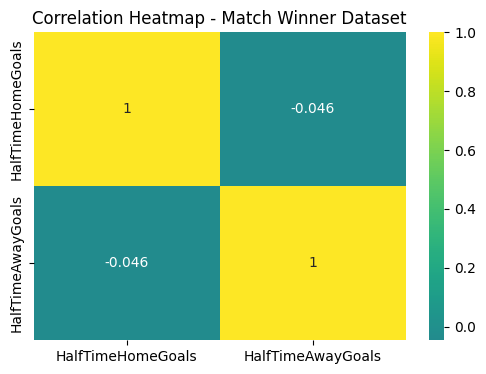

In [16]:
# numeric columns
numeric_cols = ['HalfTimeHomeGoals', 'HalfTimeAwayGoals']

# Correlation matrix
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='viridis', center=0)
plt.title("Correlation Heatmap - Match Winner Dataset")
plt.show()

In [17]:
df.head()

,HomeTeam,AwayTeam,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult
0,Charlton,Man City,H,2,0,H
1,Chelsea,West Ham,H,1,0,H
2,Coventry,Middlesbrough,A,1,1,D
3,Derby,Southampton,D,1,2,A
4,Leeds,Everton,H,2,0,H


In [18]:
#Load cleaned dataset
df = pd.read_csv("cleaned_Match_Winner.csv")


In [19]:
#Label Encoding
#encoding 'FullTimeResult' ,'HalfTimeResult', 'Home team', 'Away Team' categorical Data

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print("✅ Label Encoding applied to all categorical columns (changes kept in the same dataframe).")


Encoded HomeTeam: {'Arsenal': np.int64(0), 'Aston Villa': np.int64(1), 'Birmingham': np.int64(2), 'Blackburn': np.int64(3), 'Blackpool': np.int64(4), 'Bolton': np.int64(5), 'Bournemouth': np.int64(6), 'Bradford': np.int64(7), 'Brentford': np.int64(8), 'Brighton': np.int64(9), 'Burnley': np.int64(10), 'Cardiff': np.int64(11), 'Charlton': np.int64(12), 'Chelsea': np.int64(13), 'Coventry': np.int64(14), 'Crystal Palace': np.int64(15), 'Derby': np.int64(16), 'Everton': np.int64(17), 'Fulham': np.int64(18), 'Huddersfield': np.int64(19), 'Hull': np.int64(20), 'Ipswich': np.int64(21), 'Leeds': np.int64(22), 'Leicester': np.int64(23), 'Liverpool': np.int64(24), 'Luton': np.int64(25), 'Man City': np.int64(26), 'Man United': np.int64(27), 'Middlesbrough': np.int64(28), 'Newcastle': np.int64(29), 'Norwich': np.int64(30), "Nott'm Forest": np.int64(31), 'Portsmouth': np.int64(32), 'QPR': np.int64(33), 'Reading': np.int64(34), 'Sheffield United': np.int64(35), 'Southampton': np.int64(36), 'Stoke': n

In [20]:
#display dataset after applying label encoding
df.head()

,HomeTeam,AwayTeam,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult
0,12,26,2,2,0,2
1,13,43,2,1,0,2
2,14,28,0,1,1,1
3,16,36,1,1,2,0
4,22,17,2,2,0,2


In [21]:
#Model Training
# Define features (X) and target (y)
X = df.drop("FullTimeResult", axis=1)   # all columns except target
y = df["FullTimeResult"]                # target variable

In [22]:
print(X)

      HomeTeam  AwayTeam  HalfTimeHomeGoals  HalfTimeAwayGoals  HalfTimeResult
0           12        26                  2                  0               2
1           13        43                  1                  0               2
2           14        28                  1                  1               1
3           16        36                  1                  2               0
4           22        17                  2                  0               2
...        ...       ...                ...                ...             ...
6671         6        27                  1                  0               2
6672        31         8                  0                  1               0
6673        17        21                  2                  1               2
6674         0         6                  1                  0               2
6675         8        27                  2                  1               2

[6676 rows x 5 columns]


In [23]:
print(y)

0       2
1       2
2       0
3       1
4       2
       ..
6671    1
6672    0
6673    1
6674    0
6675    2
Name: FullTimeResult, Length: 6676, dtype: int64


In [24]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:

# Initialize the model (Random Forest is good for categorical + numerical mix)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:

# Make predictions
y_pred = model.predict(X_test)


In [27]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4086826347305389

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.45      0.42       384
           1       0.15      0.12      0.14       372
           2       0.56      0.56      0.56       580

    accuracy                           0.41      1336
   macro avg       0.37      0.38      0.37      1336
weighted avg       0.40      0.41      0.40      1336


Confusion Matrix:
 [[174 113  97]
 [164  46 162]
 [110 144 326]]


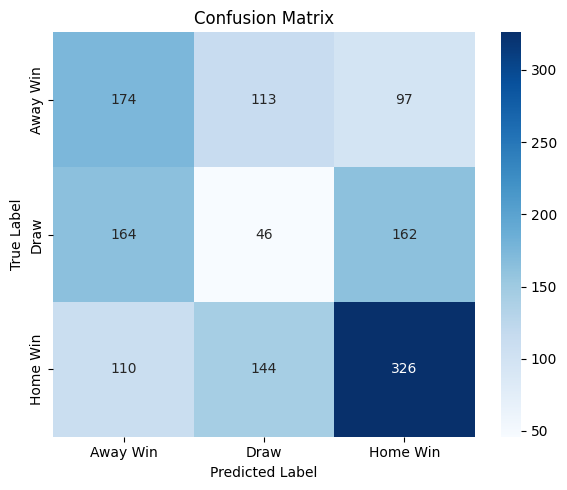

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 📊 Plot using seaborn
cm = confusion_matrix(y_test, y_pred)
class_names=['Away Win', 'Draw', 'Home Win']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model Train 
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)      

# Predict 
y_pred = reg.predict(X_test)

# Metrics calculate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Results print
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R^2 Score:", round(r2, 3))

Mean Absolute Error (MAE): 0.665
Mean Squared Error (MSE): 0.72
Root Mean Squared Error (RMSE): 0.849
R^2 Score: -0.029


In [34]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# RandomForest Model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],    
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],    
    "max_features": ["sqrt", "log2"]  
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)


print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
 Accuracy: 0.5516467065868264

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       409
           1       0.28      0.19      0.22       347
           2       0.61      0.77      0.68       580

    accuracy                           0.55      1336
   macro avg       0.50      0.50      0.50      1336
weighted avg       0.52      0.55      0.53      1336


Confusion Matrix:
 [[228  81 100]
 [ 99  65 183]
 [ 46  90 444]]


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)


# Predictions & Evaluation
y_pred = dt.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, ))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.38248502994011974

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.45      0.42       409
           1       0.16      0.17      0.16       347
           2       0.56      0.46      0.50       580

    accuracy                           0.38      1336
   macro avg       0.37      0.36      0.36      1336
weighted avg       0.40      0.38      0.39      1336


Confusion Matrix:
 [[186 149  74]
 [156  60 131]
 [141 174 265]]
